# Explicación inicial de Regresión lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra un ejemplo para explicar el concepto de regresión lineal, se explica lo que se realiza cuando se aplica un algoritmo de regresión lineal, en este caso, el más sencillo de todos.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)

Para verificar si está instalado pandas, numpy o matplotlib ejecutar:

```bash
pip show pandas
```

```bash
pip show numpy
```

```bash
pip show matplotlib
```

In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Algoritmo para crear el modelo
from sklearn.linear_model import LinearRegression
# Evaluación del modelo
from sklearn.metrics import mean_squared_error

# Datos de ejemplo
+ Se trabaja con un conjunto simple de puntos
+ X representa los valores de entrada (variable independiente)
+ y representa los valores a predecir (variable dependiente)

Pendiente o coeficiente (m): 0.80
Intersección con el eje Y (b): 0.40


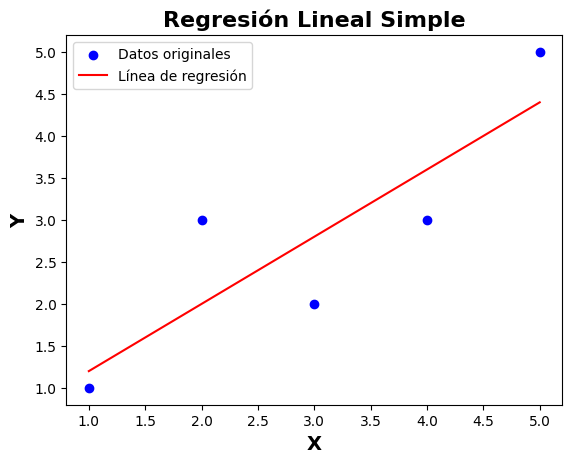

In [ ]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape convierte el array en columna
y = np.array([1, 3, 2, 3, 5])

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones (en este caso predice para los mismos puntos)
y_pred = modelo.predict(X)

# Mostrar los resultados
print("Pendiente o coeficiente (m): {:.2f}".format(modelo.coef_[0]))
print("Intersección con el eje Y (b): {:.2f}".format(modelo.intercept_))

# Graficar los puntos originales
plt.scatter(X, y, color='blue', label='Datos originales')

# Graficar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Etiquetas y título del gráfico
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title('Regresión Lineal Simple', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()


Esto significa que la línea de regresión es:

y = 0.8x + 0.4


In [ ]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [ ]:
# Cálculo del error (valor real - valor predicho)
error = y - y_pred

# Crear un DataFrame para mostrar los resultados
tabla = pd.DataFrame({
    'X': np.array([1, 2, 3, 4, 5]),
    'Y (Real)': y,
    'Y (Predicho)': y_pred,
    'Error': error
})

# Mostrar la tabla
print(tabla)

   X  Y (Real)  Y (Predicho)  Error
0  1         1           1.2   -0.2
1  2         3           2.0    1.0
2  3         2           2.8   -0.8
3  4         3           3.6   -0.6
4  5         5           4.4    0.6


In [ ]:
# Cálculo manual del MSE
mse_manual = np.mean((y - y_pred) ** 2)

# Cálculo del MSE usando scikit-learn
mse_sklearn = mean_squared_error(y, y_pred)

# Mostrar ambos resultados
print(f"MSE calculado manualmente: {mse_manual : .2f}")
print(f"MSE calculado con scikit-learn: {mse_sklearn : .2f}")

MSE calculado manualmente:  0.48
MSE calculado con scikit-learn:  0.48
